In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns

# Problem statement- Code to predict acceptance chance of university admission

In this project , a regression model is developed to predict the probability of being accepted for Graduate school

In [2]:
admission_df=pd.read_csv('Admission_Prediction.csv')

In [3]:
admission_df.head(4)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80


In [4]:
admission_df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [5]:
admission_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
admission_df['University Rating'] = admission_df['University Rating'].fillna(admission_df['University Rating'].mode()[0])
admission_df['TOEFL Score'] = admission_df['TOEFL Score'].fillna(admission_df['TOEFL Score'].mean())
admission_df['GRE Score']  = admission_df['GRE Score'].fillna(admission_df['GRE Score'].mean())

In [7]:
admission_df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Visulaize the data

In [8]:
admission_df=admission_df.drop(['Serial No.'],axis=1)

In [9]:
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73


In [10]:
column_headers=admission_df.columns.values

In [11]:
column_headers

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR',
       'CGPA', 'Research', 'Chance of Admit'], dtype=object)

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

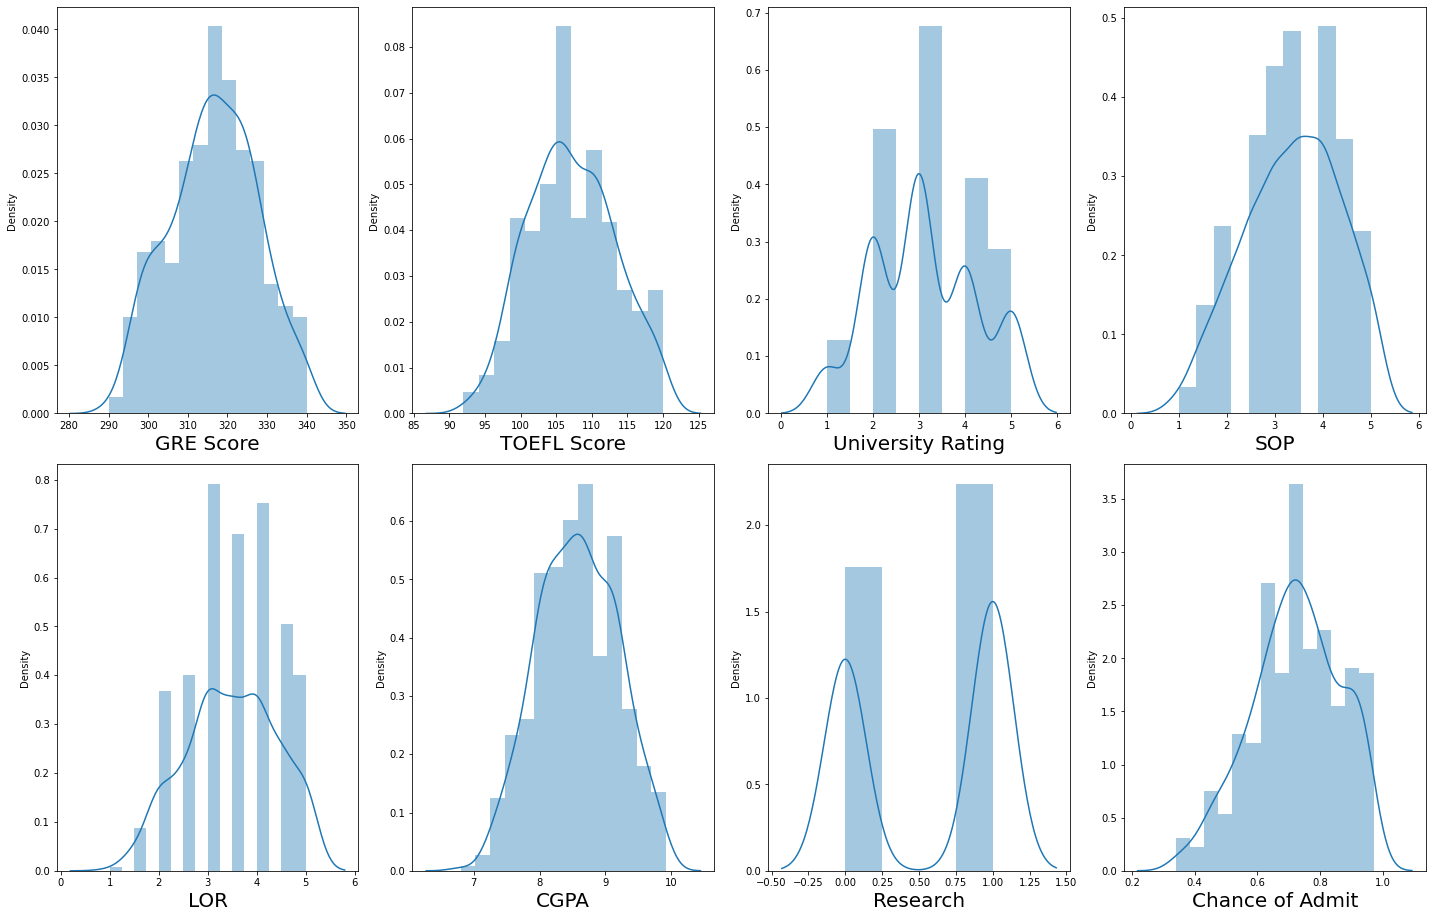

In [12]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in admission_df:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(admission_df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()
# i=1
# fig,ax=plt.subplots(2,4,figsize=(20,20))
# for column_header in admission_df:
#     plt.subplot(2,4,i)
#     sns.displot(admission_df[column_header])
#     i=i+1


The data distribution looks decent enough and there doesn't seem to be any skewness. Great let's go ahead!

Let's observe the relationship between independent variables and dependent variable.

<AxesSubplot:>

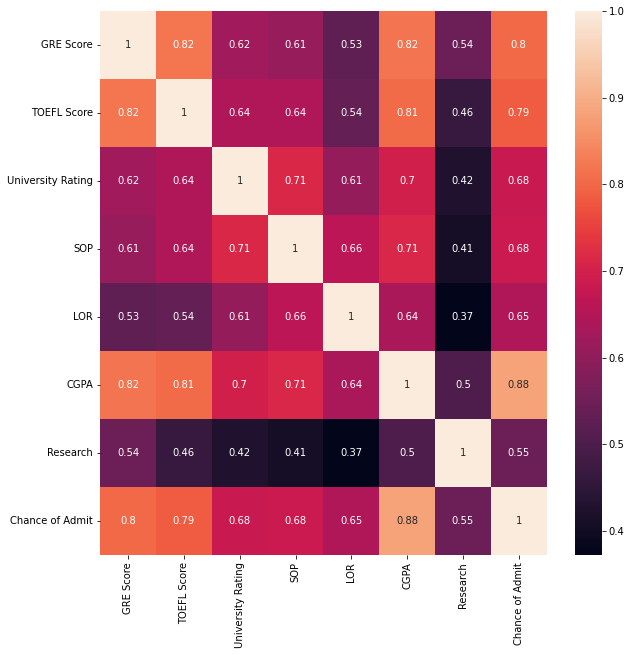

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(admission_df.corr(),annot=True)

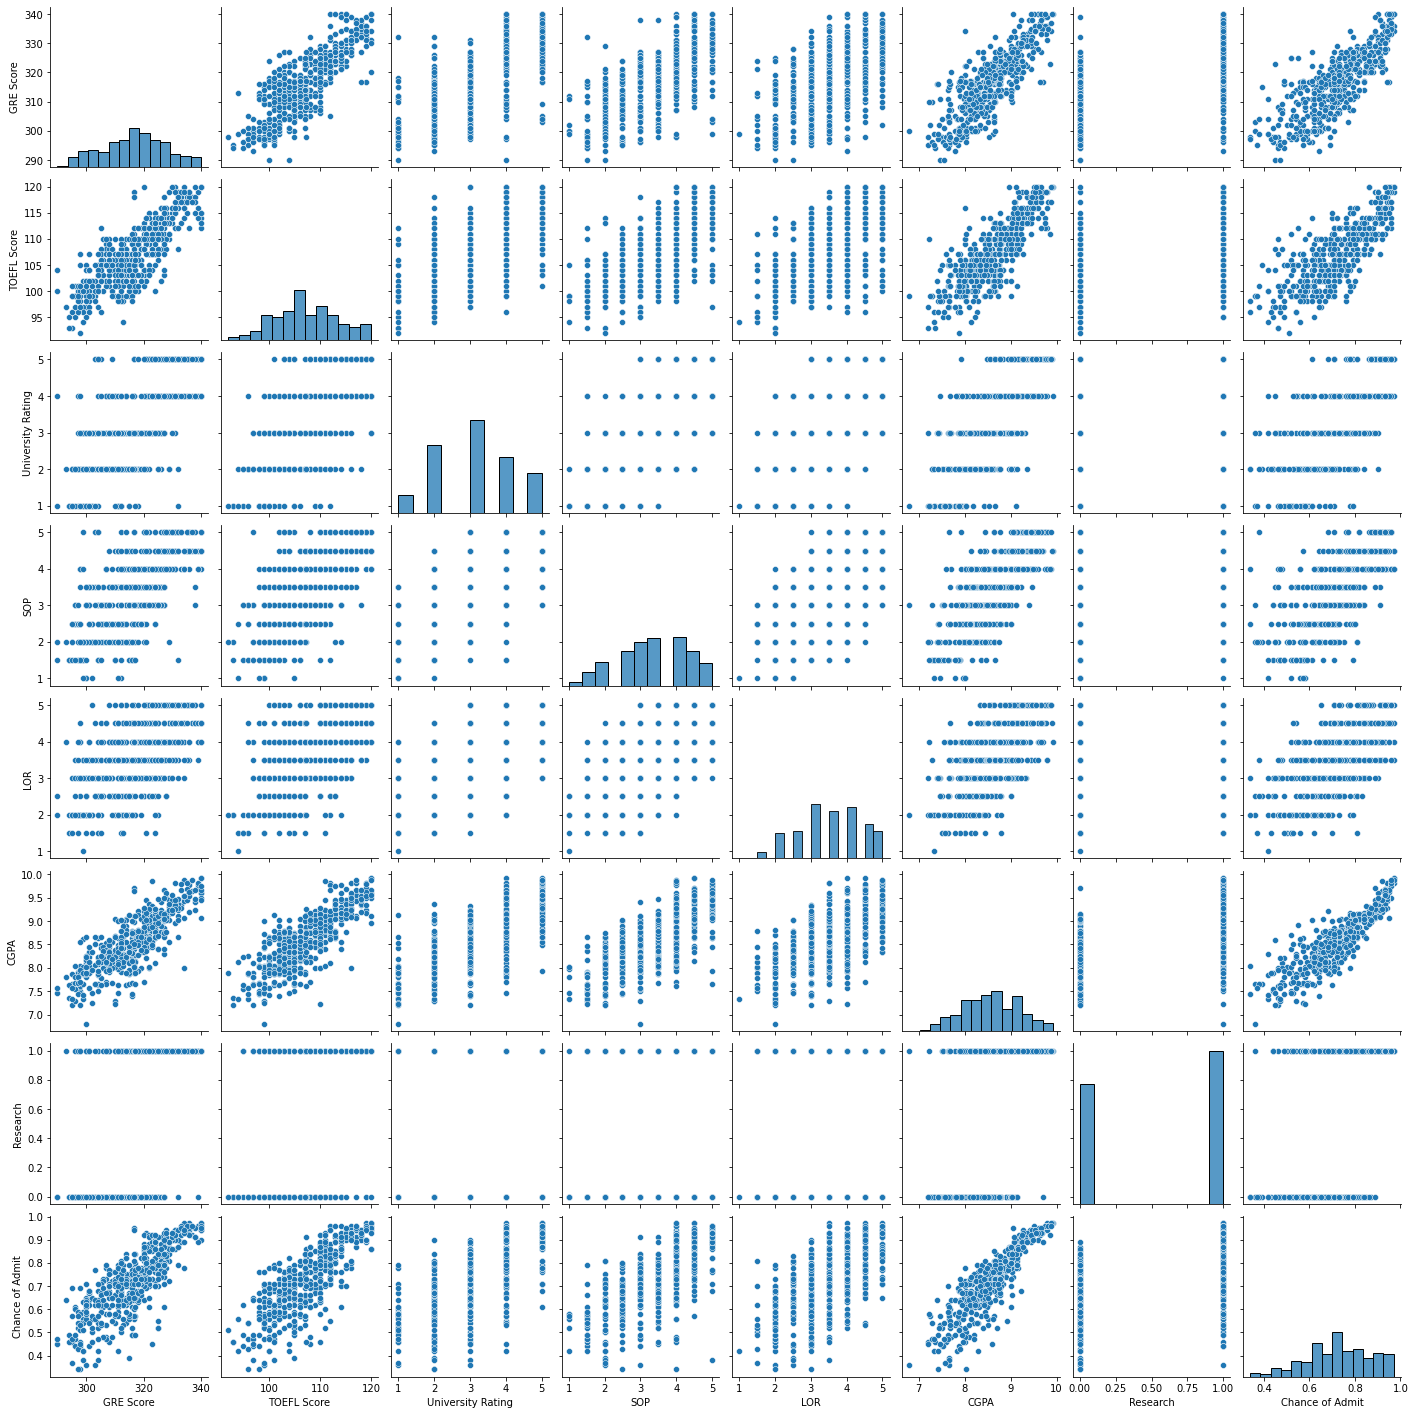

In [14]:
sns.pairplot(admission_df)

# Create testing and training dataset/Data cleaning

<AxesSubplot:>

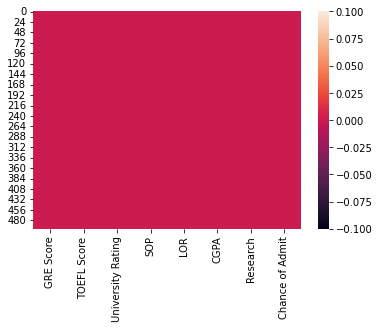

In [15]:
#to check null value
sns.heatmap(admission_df.isnull())

In [16]:
y = admission_df['Chance of Admit']
X =admission_df.drop(columns = ['Chance of Admit'],axis=1)

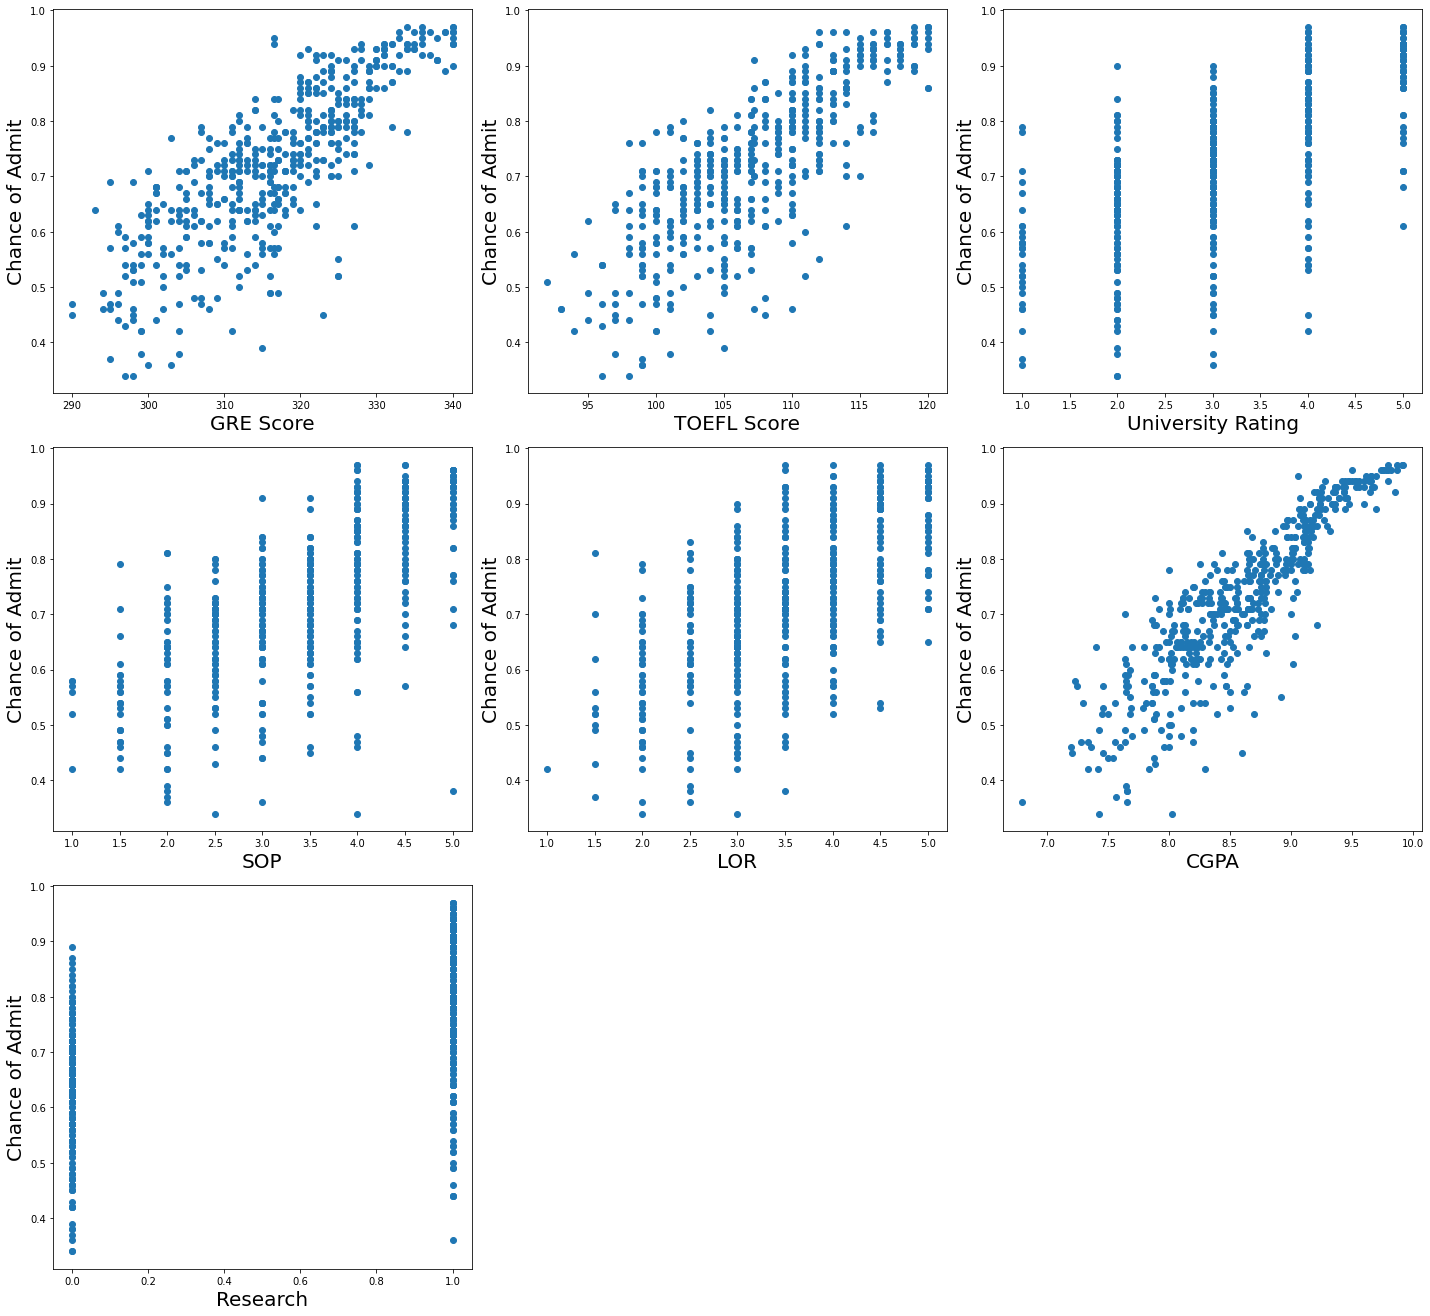

In [17]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# TRAINING THE MODEL

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=355)

In [29]:
X_train.shape

(375, 7)

In [30]:
X_test.shape

(125, 7)

In [31]:
regressor=LinearRegression(fit_intercept=True)
regressor.fit(X_train,y_train)

LinearRegression()

In [32]:
print('Linear model Coeff(m)',regressor.coef_)
print('Linear model Coeff(b)',regressor.intercept_)

Linear model Coeff(m) [0.00210724 0.0018642  0.00382886 0.00144171 0.0160296  0.13047543
 0.01990266]
Linear model Coeff(b) -1.3464908093890955


In [34]:
regressor.score(X_train,y_train)

0.8415250484247909

In [35]:
regressor.score(X_test,y_test)

0.753489883147107

# Evaluating the model

In [36]:
y_predict=regressor.predict(X_test)
y_predict

array([0.42671078, 0.840992  , 0.639163  , 0.84960684, 0.97242831,
       0.67815622, 0.64471497, 0.51718923, 0.65646131, 0.43779919,
       0.82448737, 0.59924484, 0.77090128, 0.70721701, 0.66488888,
       0.66844094, 0.7598087 , 0.66796236, 0.58985033, 0.82882511,
       0.67245483, 0.76580406, 0.82111094, 0.56069037, 0.58862035,
       0.68435618, 0.48566015, 0.78548109, 0.78640408, 0.81979647,
       0.72920656, 0.97403144, 0.94563084, 0.72219204, 0.7781274 ,
       0.65627586, 0.85570211, 0.7325153 , 0.66311202, 0.62174418,
       0.63972461, 0.62800767, 0.69247539, 0.61804461, 0.64191495,
       0.68295594, 0.5976811 , 0.76515832, 0.73758316, 0.60575541,
       0.6690648 , 0.77119619, 0.64562653, 0.92685189, 0.64901754,
       0.80628668, 0.50061588, 0.84504464, 0.7511868 , 0.45917044,
       0.78745912, 0.57289054, 0.75358675, 0.65266467, 0.61517764,
       0.94438015, 0.62395745, 0.67793886, 0.86383045, 0.62828468,
       0.95655226, 0.95065944, 0.83034706, 0.53044513, 0.62686

Text(0.5, 0, 'True(Ground truth)')

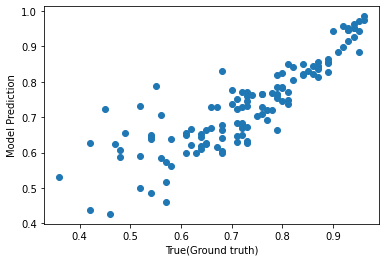

In [37]:
plt.scatter(y_test,y_predict)
plt.ylabel('Model Prediction')
plt.xlabel('True(Ground truth)')

# Calculting R2 value

In [38]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt
k=X_test.shape[1]
n=len(X_test)

In [39]:
RMSE=float(format(np.sqrt(mean_squared_error(y_test,y_predict)),'.3f'))
MSE=mean_squared_error(y_test,y_predict)
MAE=mean_absolute_error(y_test,y_predict)
r2=r2_score(y_test,y_predict)
adj_r2=adjusted_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [40]:
print('RMSE=',RMSE ,'\nMSE=',MSE ,'\nMAE=',MAE ,'\nr2=',r2 ,'\nadj_r2=',adj_r2)

RMSE= 0.07 
MSE= 0.004900961898621049 
MAE= 0.049527710262101 
r2= 0.753489883147107 
adj_r2= 0.7387414146174467


# Retraining and visualizing the data

In [41]:
X=admission_df[['GRE Score','TOEFL Score']]
y=admission_df['Chance of Admit']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [44]:
regressor=LinearRegression(fit_intercept=True)
regressor.fit(X_train,y_train)

LinearRegression()

In [45]:
y_predict=regressor.predict(X_test)

Text(0.5, 0, 'True(Ground truth)')

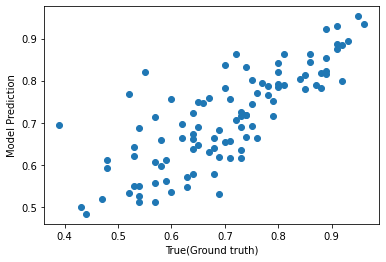

In [46]:
plt.scatter(y_test,y_predict)
plt.ylabel('Model Prediction')
plt.xlabel('True(Ground truth)')

In [47]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt
k=X_test.shape[1]
n=len(X_test)
RMSE=float(format(np.sqrt(mean_squared_error(y_test,y_predict)),'.3f'))
MSE=mean_squared_error(y_test,y_predict)
MAE=mean_absolute_error(y_test,y_predict)
r2=r2_score(y_test,y_predict)
adj_r2=adjusted_r2 = 1-(1-r2)*(n-1)/(n-k-1)
print('RMSE=',RMSE ,'\nMSE=',MSE ,'\nMAE=',MAE ,'\nr2=',r2 ,'\nadj_r2=',adj_r2)

RMSE= 0.081 
MSE= 0.006634790957690888 
MAE= 0.06045016985420391 
r2= 0.6201038687819243 
adj_r2= 0.612270958859902


In [48]:
ab=regressor.predict(X_train)
ab.shape

(400,)

In [49]:
from mpl_toolkits.mplot3d import Axes3D

In [51]:
from mpl_toolkits.mplot3d import Axes3D
x_surf,y_surf=np.meshgrid(np.linspace(admission_df['GRE Score'].min(),admission_df['GRE Score'].max(),100),np.linspace(admission_df['TOEFL Score'].min(),admission_df['TOEFL Score'].max(),100))
onlyX=pd.DataFrame({'GRE Score':x_surf.ravel(),'TOEFL Score':y_surf.ravel()})
fittedY=regressor.predict(onlyX)
fittedY=fittedY.reshape(x_surf.shape)


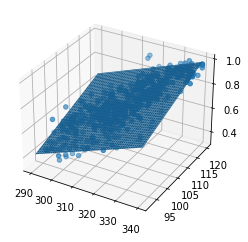

In [52]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(admission_df['GRE Score'],admission_df['TOEFL Score'],admission_df['Chance of Admit'])
ax.plot_surface(x_surf,y_surf,fittedY)